Mount the google in the content

In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
def create_model(myact, directory):
  chanDim = -1
  input_shape = (28, 28, 1)
  model_original = load_model(os.path.join(directory, "prenetwork/99.4_CNN.h5"))
  #model_original = load_model(CNN_weight_path)
  model = Sequential()
  # Layer 1 Conv2D
  cnn_layer = Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = input_shape)
  cnn_layer.trainable=False
  model.add(cnn_layer)
  cnn_layer2= Conv2D(filters = 32, kernel_size = 5, strides = 1, use_bias=False)
  cnn_layer2.trainable=False
  model.add(cnn_layer2)
  cnn_layer3=BatchNormalization()
  cnn_layer3.trainable=False
  model.add(cnn_layer3)
  model.add(Activation('relu'))  
  model.add(MaxPooling2D(pool_size = 2, strides = 2))
  model.add(Dropout(0.25))
  # Layer 3 Conv2D
  cnn_layer4= Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu')
  cnn_layer4.trainable=False
  model.add(cnn_layer4)
  cnn_layer5= Conv2D(filters = 64, kernel_size = 3, strides = 1, use_bias=False)
  cnn_layer5.trainable=False
  model.add(cnn_layer5)
  cnn_layer6= BatchNormalization()
  cnn_layer6.trainable=False
  model.add(cnn_layer6)
  # Layer 4 Pooling Layer
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = 2, strides = 2))
  model.add(Dropout(0.25))
  model.add(Flatten())

  model.add(Dense(1000, use_bias=False))
  model.add(Activation(myact))
  model.add(Dense(1000, use_bias=False))
  model.add(Activation(myact))

  model.add(Dense(10, activation='softmax', use_bias=False))
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  model.layers[0].set_weights(model_original.layers[0].get_weights())
  model.layers[1].set_weights(model_original.layers[1].get_weights())
  model.layers[2].set_weights(model_original.layers[2].get_weights())
  model.layers[6].set_weights(model_original.layers[6].get_weights())
  model.layers[7].set_weights(model_original.layers[7].get_weights())
  model.layers[8].set_weights(model_original.layers[8].get_weights())
  return model

In [3]:
import numpy as np   # science calculate  instill numpy

import struct  # y???????
from sklearn.utils import shuffle  # instill scikit-learn/ scikit
import time  
import os  # o??????????
import scipy
from scipy import io
import torch as tc
import tensorflow as tf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from tqdm import tqdm, trange
from tensorflow.keras import datasets
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,Activation,BatchNormalization,AveragePooling2D,MaxPooling2D
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

from keras.layers import LeakyReLU
def Leakeyrelu(x):
    return tf.keras.layers.LeakyReLU(alpha=0.02)(x)
get_custom_objects().update({'Leakeyrelu': Activation(Leakeyrelu)})

# tf.random.set_seed(21)

# (x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# myacti = {0: "relu",
#           1: "sigmoid",
#           2: "swish",
#           3: "selu",
#           4: "softsign",
#           5: "tanh",
#           6: "Leakeyrelu"}
          
# for i in range(len(myacti)):
#   if i > -10:
#     directorybase = ("/content/drive/MyDrive/PBCDcode/MNIST/data/activations")
#     if not os.path.exists(directorybase):
#           os.makedirs(directorybase)
#     directory = os.path.join(directorybase, myacti[i] + "network")
#     directory1 = os.path.join(directory, "history1.mat")
#     directory2 = os.path.join(directory, "history2.mat")
#     if not os.path.exists(directory):
#         os.makedirs(directory)

#     model = create_model(myacti[i], "/content/drive/MyDrive/PBCDcode/MNIST/data")
#     history1 = model.fit(x_train, y_train, epochs= 2, batch_size = 128, validation_data=(x_test, y_test) )
#     history2 = model.fit(x_train, y_train, epochs= 200, batch_size = 60000, validation_data=(x_test, y_test))

#     history_dict1 = history1.history
#     history_dict2 = history2.history

#     io.savemat(directory1, history_dict1)
#     io.savemat(directory2, history_dict2)
#     print("========================================================")
#     print("=====================New activation=====================")
#     print("The current activation is: {}, final test acc is: {},".format(
#         myacti[i], history_dict2['val_accuracy'][-1]))
#     print("========================================================")




In [4]:
directorybase = ("/content/drive/MyDrive/PBCDcode/MNIST/data/activations")
myacti = {0: "relu",
          1: "sigmoid",
          2: "swish",
          3: "selu",
          4: "tanh",}
history_train = np.zeros((10,151))
history_test = np.zeros((10,151))
for i in range(len(myacti)):
  directory = os.path.join(directorybase, myacti[i] + "network")
  directory1 = os.path.join(directory, "history1.mat")
  directory2 = os.path.join(directory, "history2.mat")
  history_dict1 = io.loadmat(directory1)
  history_dict2 = io.loadmat(directory2)
  c1 = np.append(np.array(history_dict1['accuracy']), np.array(history_dict2['accuracy']))
  c2 = np.append(np.array(history_dict1['val_accuracy']), np.array(history_dict2['val_accuracy']))
  # print(history_dict1['accuracy'].shape, history_dict2['accuracy'].shape, c.shape)
  history_train[i,0:len(c1)] = c1
  history_test[i,0:len(c2)] = c2
  print(i, len(c1))
  if i == 0:
    train1 = np.array(history_dict1['accuracy'])
    test1 = np.array(history_dict1['val_accuracy'])

i += 1      
train2 = np.load("/content/drive/MyDrive/PBCDcode/MNIST/data/result/history1.npy")
c1 = np.append(train1, train2/10000)

test2 = np.load("/content/drive/MyDrive/PBCDcode/MNIST/data/result/history2.npy")
c2 = np.append(test1, test2/10000)

history_train[i,0:len(c1)] = c1
history_test[i,0:len(c2)] = c2
print(i, len(c1))


  

0 39
1 39
2 39
3 39
4 39
5 101


0.989133358001709 0.010866641998291016
0.9904666543006897 0.009533345699310303
0.9893666505813599 0.010633349418640137
0.9895666837692261 0.010433316230773926
0.9876999855041504 0.01230001449584961
0.9954 0.0046000000000000485


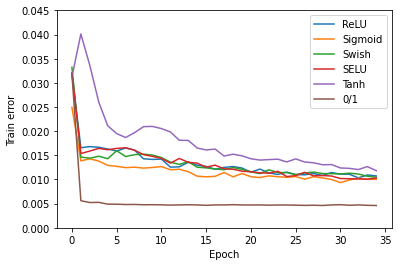

0.9922999739646912 0.007700026035308838
0.9925000071525574 0.007499992847442627
0.9916999936103821 0.00830000638961792
0.9918000102043152 0.008199989795684814
0.9901999831199646 0.0098000168800354
0.9931 0.006900000000000017


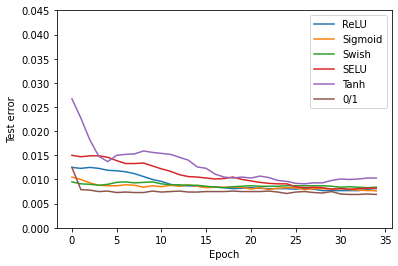

In [6]:
import numpy as np   # science calculate  instill numpy
import matplotlib.pyplot as plt

directory = ("/content/drive/MyDrive/PBCDcode/MNIST/data/result")
  
myacti = {0: "ReLU",
          1: "Sigmoid",
          2: "Swish",
          3: "SELU",
          4: "Tanh",
          5: "0/1"}

for i in range(0,len(myacti)):
  plt.plot(1-history_train[i, 0:35], label= str(myacti[i]))
  print(history_train[i, 35], np.min(1-history_train[i, 35]))
  plt.xlabel('Epoch')
  plt.ylabel('Train error')
  plt.ylim([0, 0.045])
  plt.legend(loc='upper right')
plt.savefig(os.path.join(directory, "trainacc.pdf"))
plt.show()
# # plt.savefig()
# print(history_train[7, 0:30])

for i in range(0,len(myacti)): # in range(8):
  plt.plot(1-history_test[i, 0:35], label= str(myacti[i]))
  plt.xlabel('Epoch')
  plt.ylabel('Test error')
  plt.ylim([0.0000, 0.045])
  plt.legend(loc='upper right')
  print(history_test[i, 35], np.min(1-history_test[i, 35]))

plt.savefig(os.path.join(directory, "testacc.pdf"))
plt.show()

# print(history_test[7, 0:30])

In [ ]:
#history = model.fit(X_train, Y_train, epochs=60, batch_size=1, verbose=2)
# plot metrics
# data_name = "MNIST01""relu" softsign tanh selu sigmoid

myacti = {0: "relu",
          1: "sigmoid",
          2: "tanh",
          3: "selu",
          4: "softsign",
          5: "swish"}
a = 1
for i in range(len(myacti)):
  if i>1:
    print(myacti[i])
    print("The current activation is: {}, final acc is: {},".format(
        myacti[i], history_dict2['val_accuracy'][-1]))
# history_dict1 = history1.history
# history_dict2 = history2.history
# from scipy import io
# io.savemat(directory1, history_dict1)
# io.savemat(directory2, history_dict2)

# history_dict1 = io.loadmat('/content/drive/MyDrive/Code_in_google/logs/relunetwork/history2.mat')
# train_acc1 = history_dict1['accuracy']




# ytr = history2.history['accuracy']
# yte =  history2.history['val_accuracy']
# plt.plot(ytr, label='Train accuracy')
# plt.plot(yte, label = 'Test accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.97, 1])
# plt.legend(loc='lower right')
# plt.show()

tanh
The current activation is: tanh, final acc is: 0.993399977684021,
selu
The current activation is: selu, final acc is: 0.993399977684021,
softsign
The current activation is: softsign, final acc is: 0.993399977684021,
swish
The current activation is: swish, final acc is: 0.993399977684021,
